## Correlation between regions

Rankings (driest year in 120 year observational record)

|      | all | south-west | south-east | north-east |
| ---  | --- | ---        | ---        | ---        |
| 2019 | 1   | 1          | 6          | 1          | 
| 2002 | 2   | 8          | 8          | 6          |
| 1994 | 4   | 4          | 10         | 9          |
| 2006 | 7   | 46         | 3          | 7          |

Return period in model ensemble

|      | all  | south-west | south-east | north-east |
| ---  | ---  | ---        | ---        | ---        |
| 2019 | 2142 | 40         | 18         | 685        | 
| 2002 | 51   | 14         | 16         | 13         |
| 1994 | 31   | 27         | 10         | 8          |
| 2006 | 16   | 2          | 22         | 11         |

Observational record correlations:
- south-east and north-east annual rainfall: 0.67
- south-east and south-west annual rainfall: 0.45
- north-east and south-west annual rainfall: 0.15

So the special features of 2019 was the exceptionally low rainfall in the north-east coupled with record-low rainfall in the south-west also (rainfall in these two regions isn't correlated).

In [8]:
import os
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')

import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr
import numpy as np

import fileio

In [3]:
agcd_file = "/g/data/xv83/dbi599/ag/pr_agcd_1900-2019_A-DEC-mean_wheat-sheep-mean.zarr.zip"
agcd_ds = fileio.open_file(agcd_file)
agcd_ds['pr'] = agcd_ds['pr'] * 365
agcd_ds['pr'].attrs['units'] = 'mm yr-1'

In [18]:
xr.corr(agcd_ds['pr'].sel(region='all'), agcd_ds['pr'].sel(region='all'), dim='time').values

array(1.)

In [19]:
regions = ['all', 'south-west', 'south-east', 'north-east']
for region1, region2 in itertools.product(regions, regions):
    corr = xr.corr(agcd_ds['pr'].sel(region=region1), agcd_ds['pr'].sel(region=region2), dim='time').values
    print(region1, region2, corr)

all all 0.9999999999999999
all south-west 0.4706094253635904
all south-east 0.8626583938896787
all north-east 0.9211354461063724
south-west all 0.4706094253635904
south-west south-west 0.9999999999999998
south-west south-east 0.4490696208442514
south-west north-east 0.14754799348884057
south-east all 0.8626583938896787
south-east south-west 0.4490696208442514
south-east south-east 1.0
south-east north-east 0.6702589616396489
north-east all 0.9211354461063724
north-east south-west 0.14754799348884057
north-east south-east 0.6702589616396489
north-east north-east 1.0000000000000004


In [22]:
regions = ['all', 'south-west', 'south-east', 'north-east']
indexes = [0, 1, 2, 3]
correlations = np.zeros([4, 4])
for index1, index2 in itertools.product(indexes, indexes):
    corr = xr.corr(agcd_ds['pr'].sel(region=regions[index1]), agcd_ds['pr'].sel(region=regions[index2]), dim='time').values
    correlations[index1, index2] = corr

In [23]:
correlations

array([[1.        , 0.47060943, 0.86265839, 0.92113545],
       [0.47060943, 1.        , 0.44906962, 0.14754799],
       [0.86265839, 0.44906962, 1.        , 0.67025896],
       [0.92113545, 0.14754799, 0.67025896, 1.        ]])

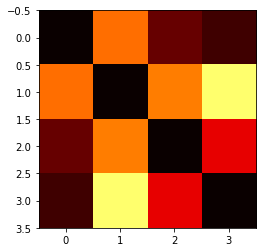

In [27]:
plt.imshow(correlations, cmap='hot_r', vmin=0, vmax=1)